# load and explore the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
url = "./dataset/agaricus-lepiota.data"
column_names = ['edibility','mushroom_cap_shape', 'mushroom_cap_surface', 'mushroom_cap_color', 'bruising_present', 'mushroom_odor', 'gill_attachment_type', 'gill_spacing', 'gill_size', 'gill_color', 'stalk_shape', 'stalk_root_type', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_count', 'ring_type', 'spore_print_color', 'mushroom_population', 'mushroom_habitat']
df = pd.read_csv(url, names=column_names)
df.head()

,edibility,mushroom_cap_shape,mushroom_cap_surface,mushroom_cap_color,bruising_present,mushroom_odor,gill_attachment_type,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_count,ring_type,spore_print_color,mushroom_population,mushroom_habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
#from agaricus-lepiota.names
df = df.replace('?', None)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edibility                 8124 non-null   object
 1   mushroom_cap_shape        8124 non-null   object
 2   mushroom_cap_surface      8124 non-null   object
 3   mushroom_cap_color        8124 non-null   object
 4   bruising_present          8124 non-null   object
 5   mushroom_odor             8124 non-null   object
 6   gill_attachment_type      8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root_type           8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [11]:
# for col in df.columns:
#     if df[col].isnull().sum() > 0:
df.update(df['stalk_root_type'].fillna(df[col].mode()[0]))


In [5]:
df.describe()

,edibility,mushroom_cap_shape,mushroom_cap_surface,mushroom_cap_color,bruising_present,mushroom_odor,gill_attachment_type,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_count,ring_type,spore_print_color,mushroom_population,mushroom_habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.isna().sum()

edibility                      0
mushroom_cap_shape             0
mushroom_cap_surface           0
mushroom_cap_color             0
bruising_present               0
mushroom_odor                  0
gill_attachment_type           0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root_type             2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_count                     0
ring_type                      0
spore_print_color              0
mushroom_population            0
mushroom_habitat               0
dtype: int64

# visuals and analysis

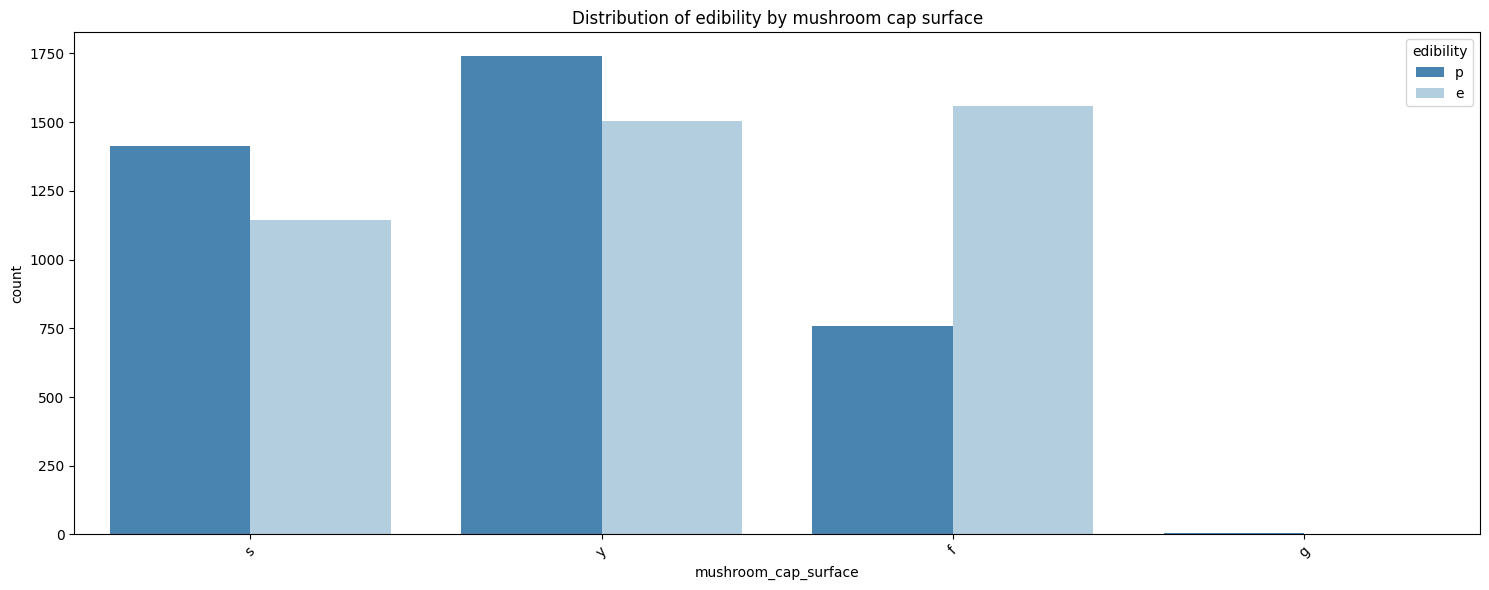

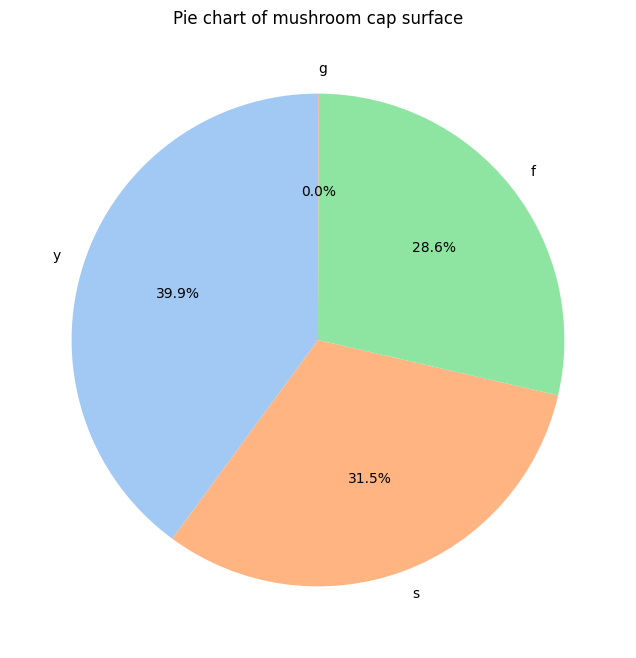

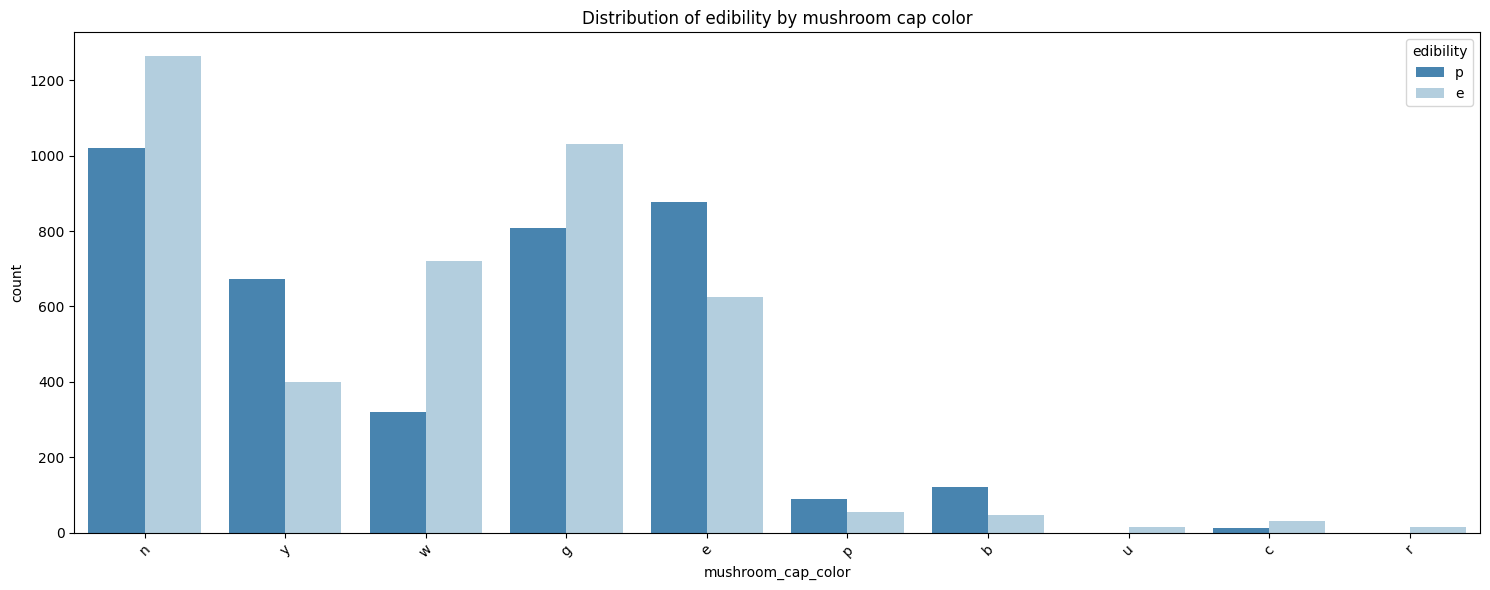

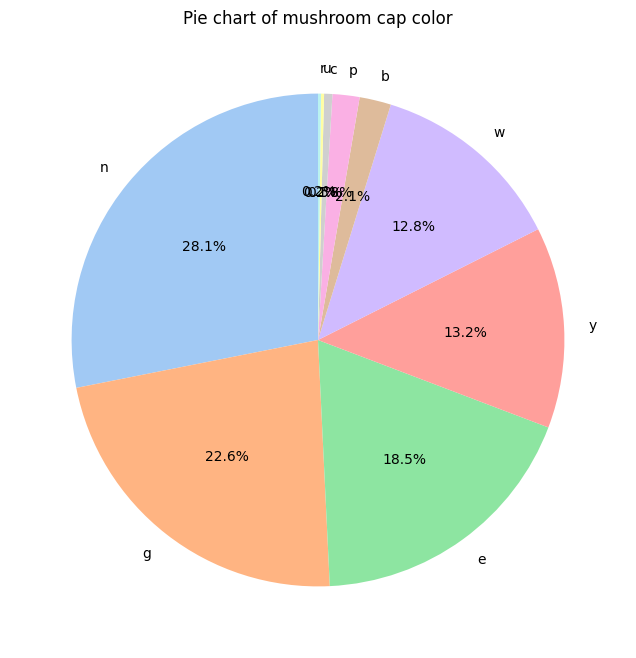

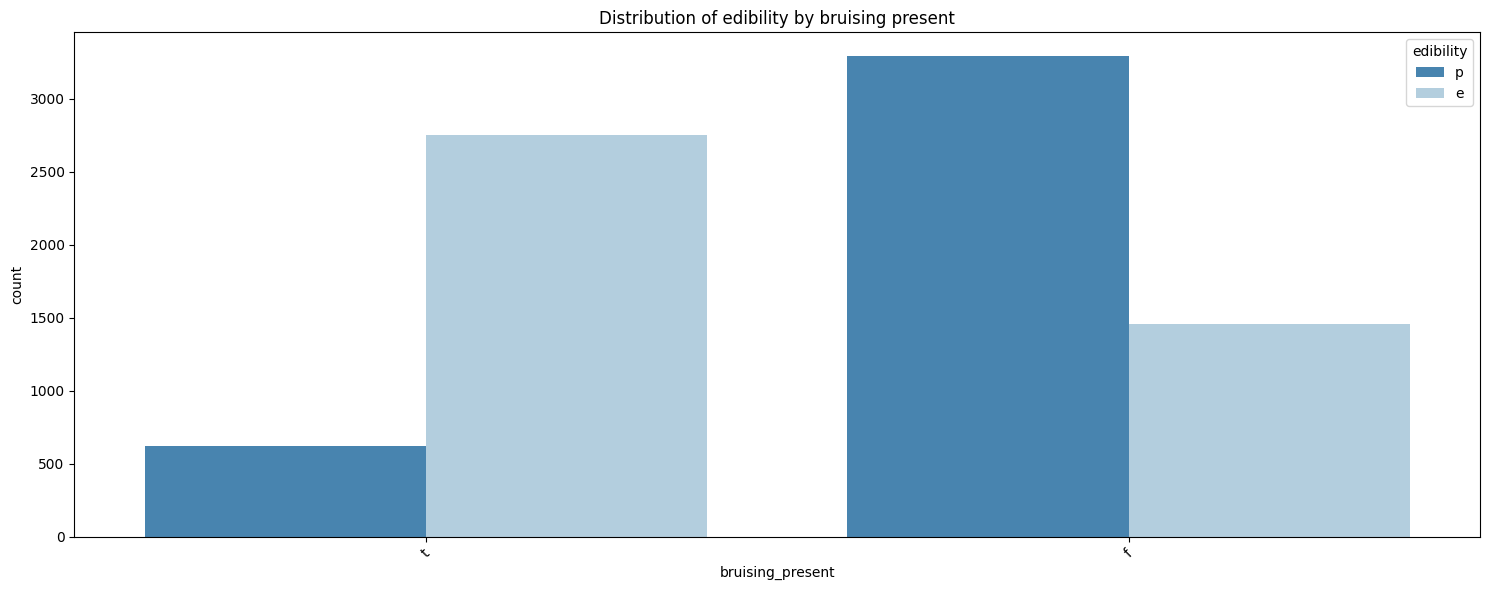

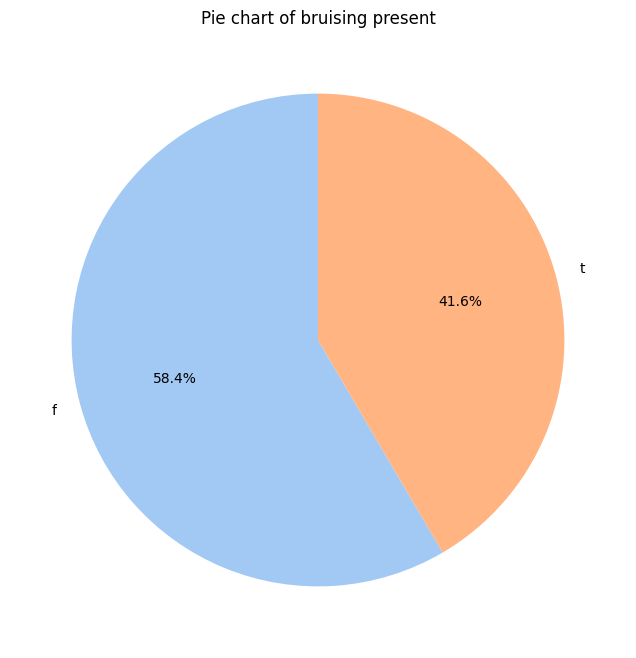

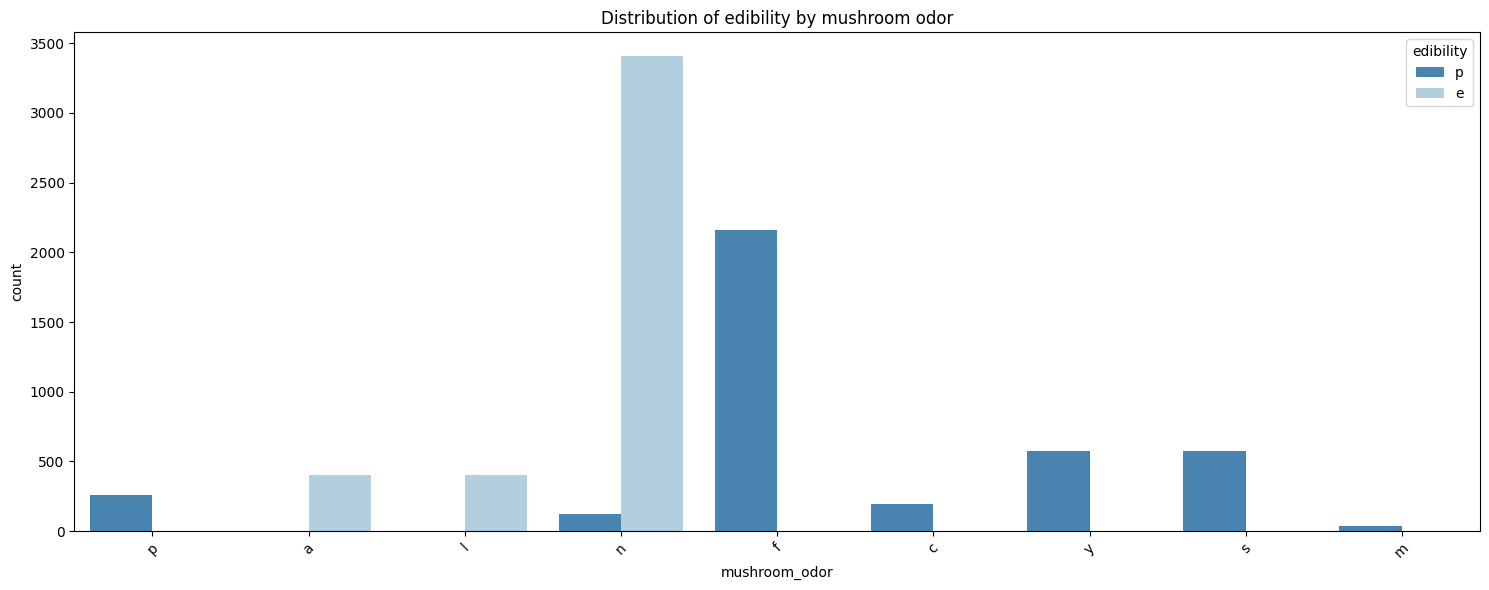

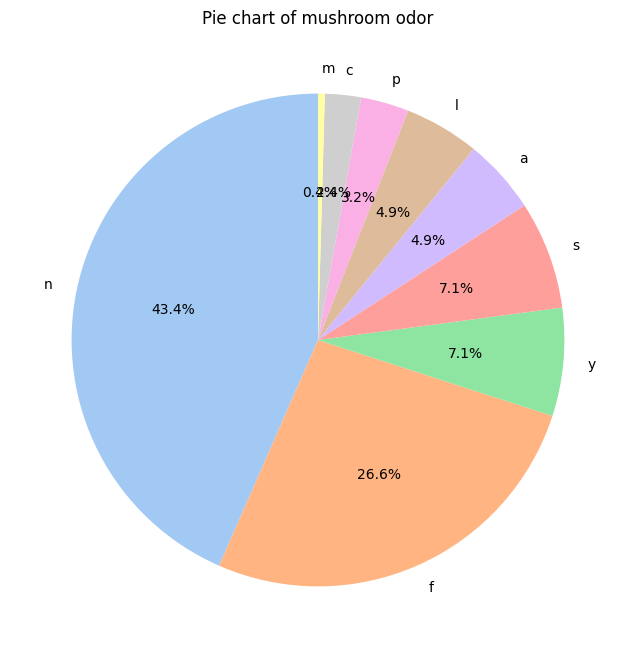

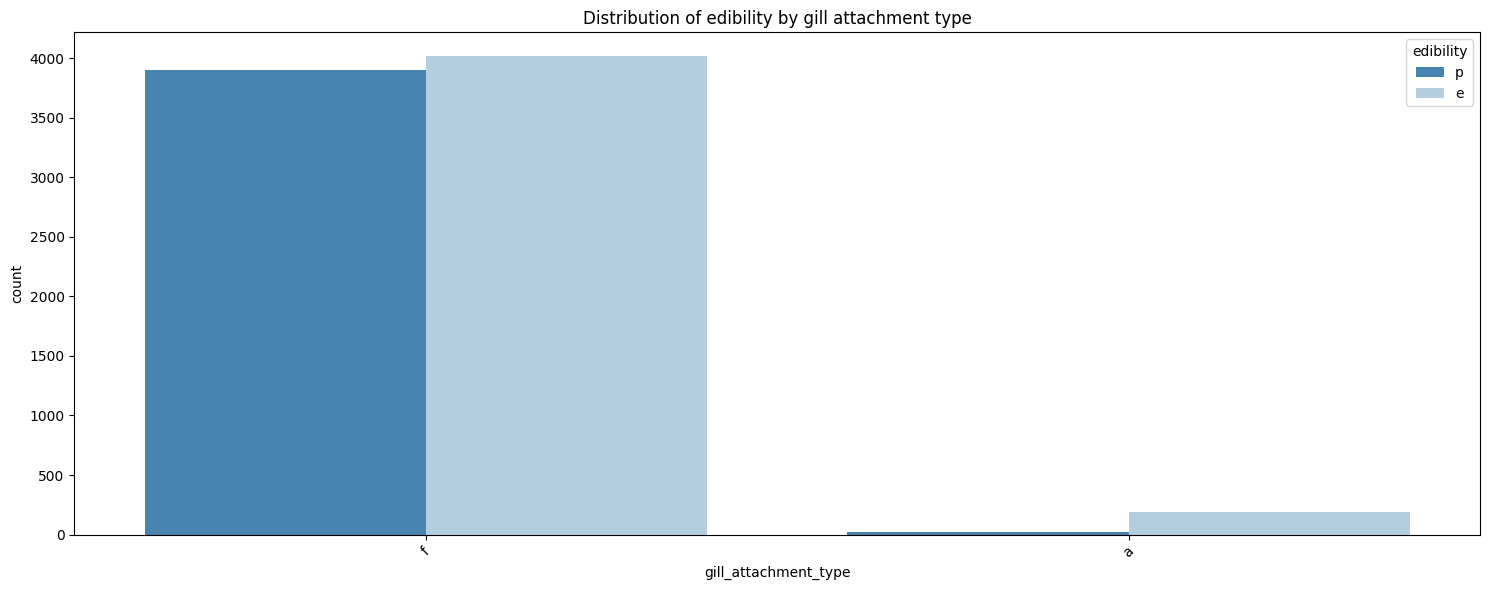

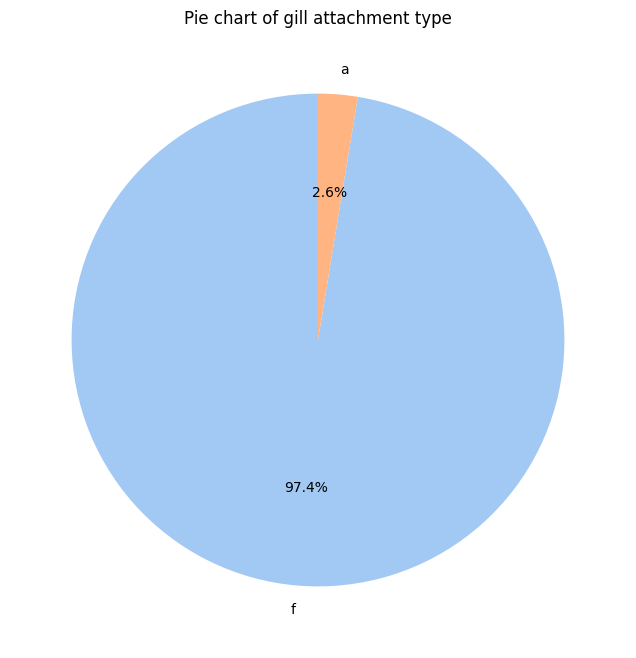

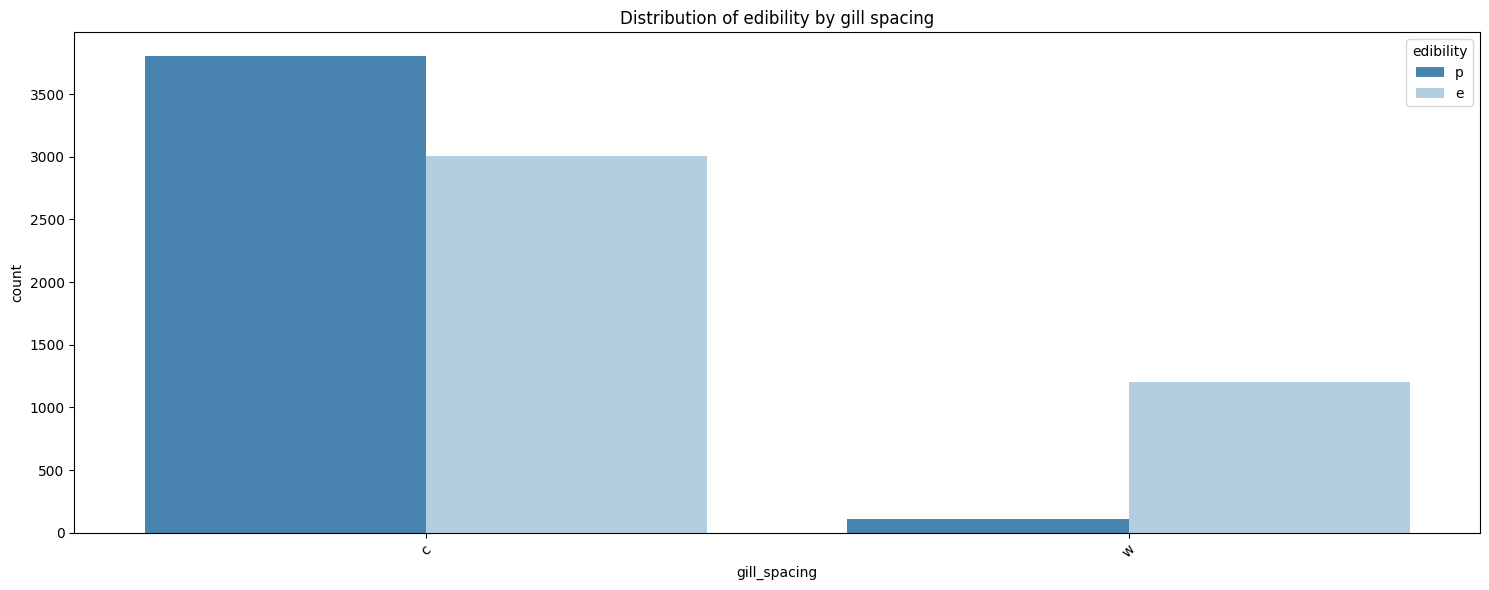

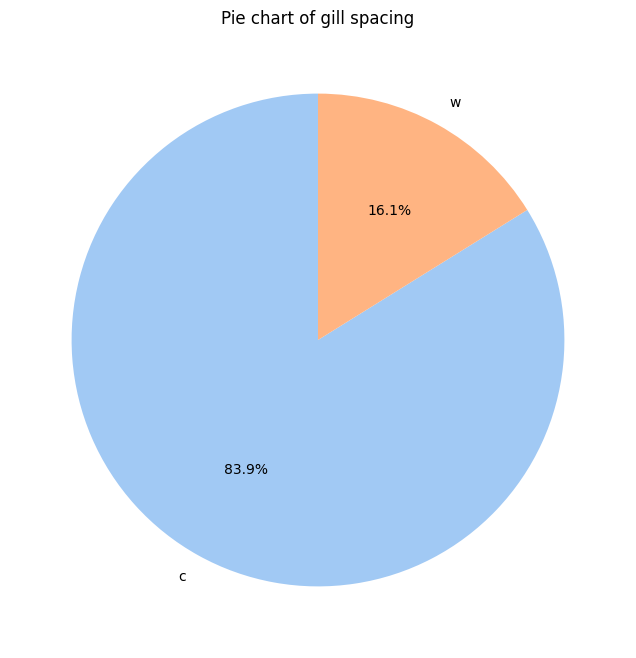

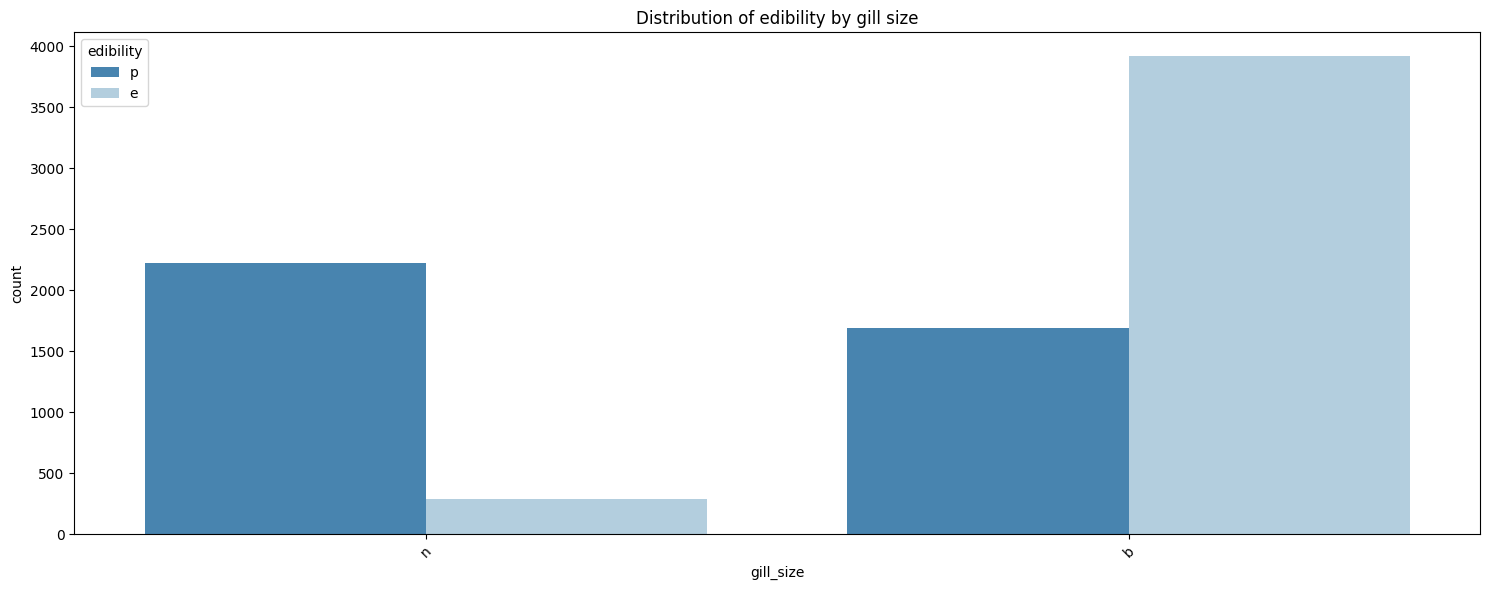

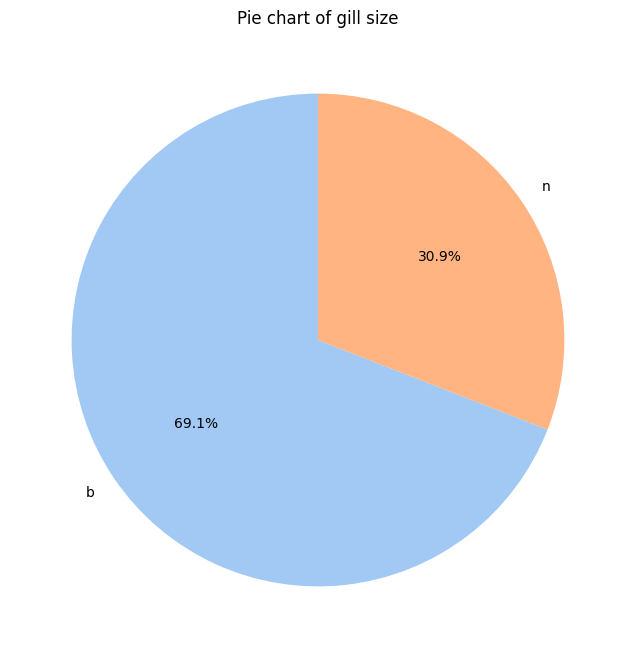

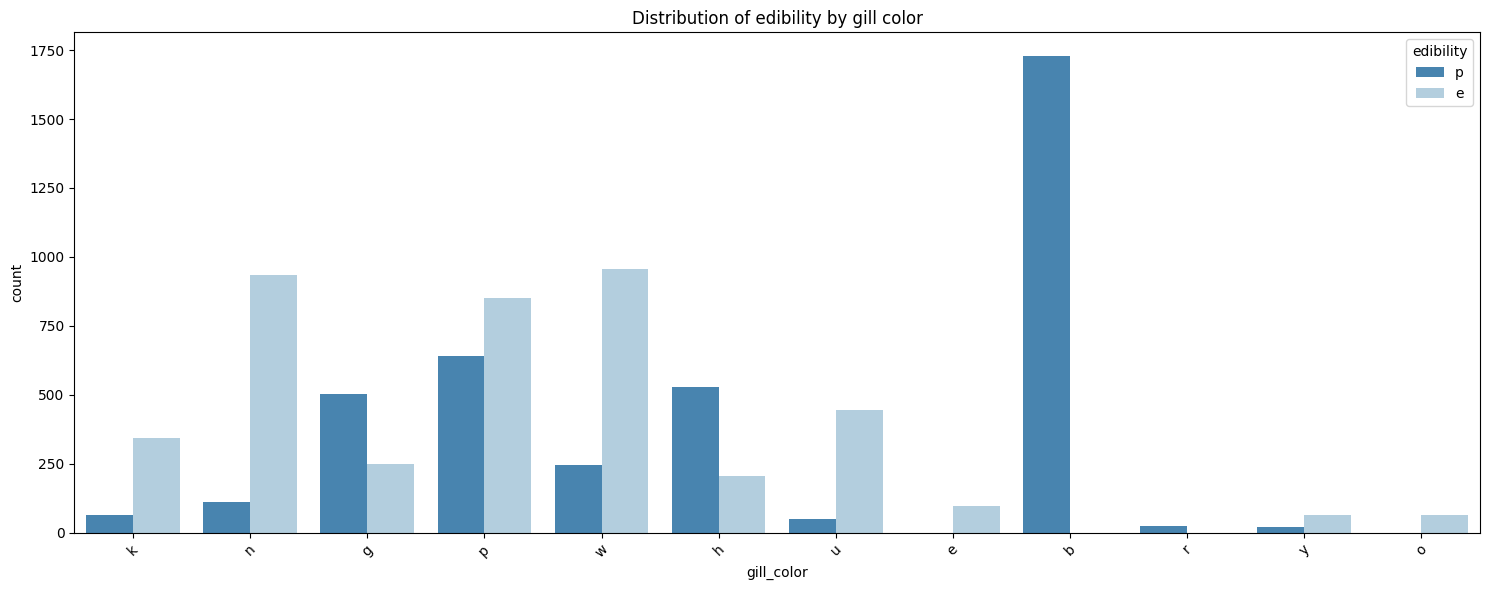

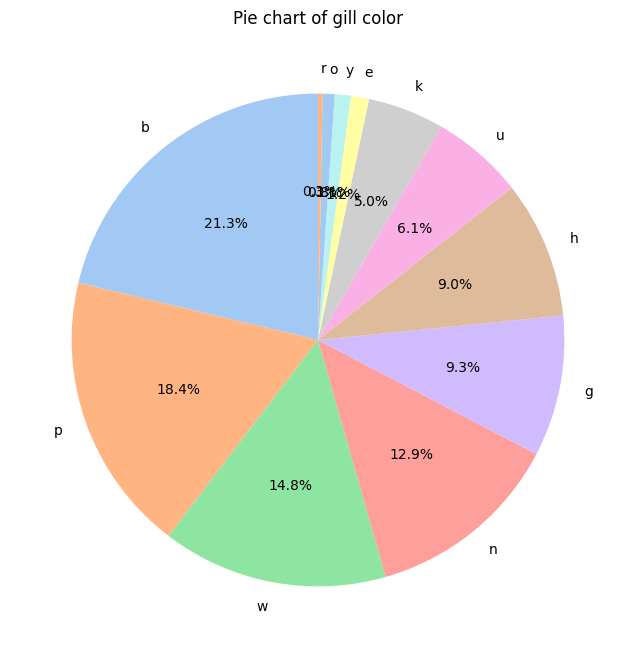

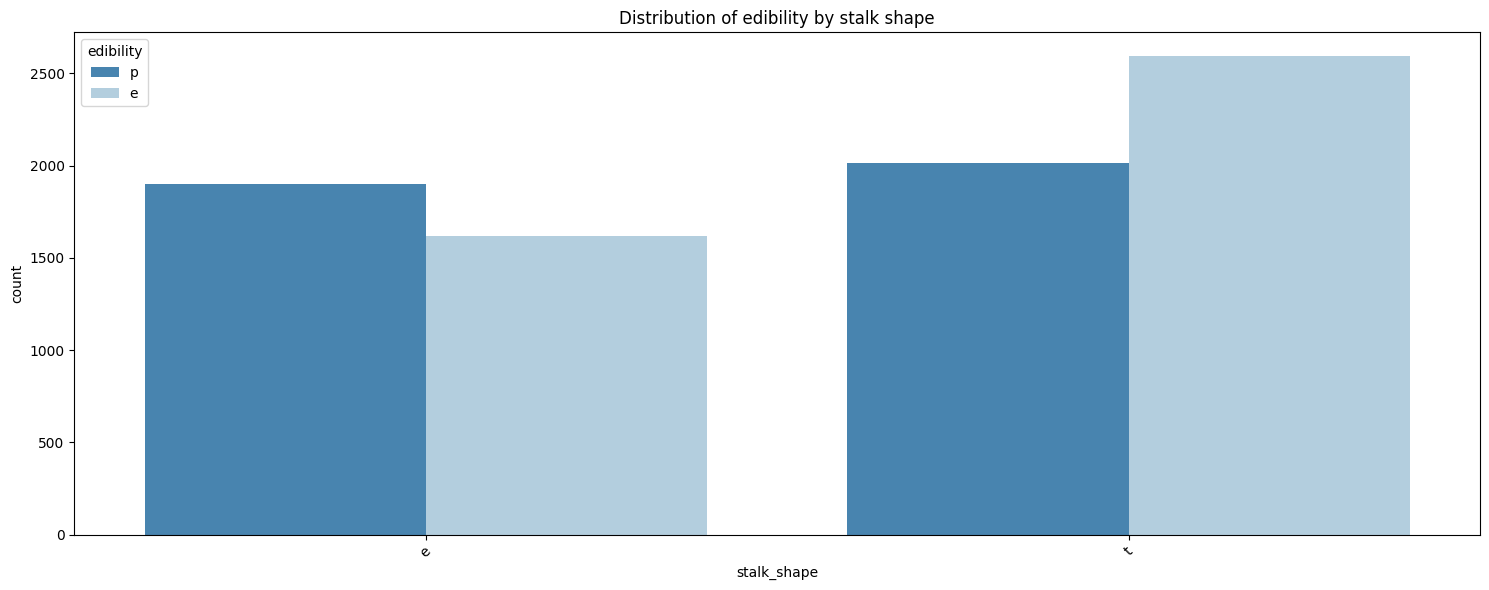

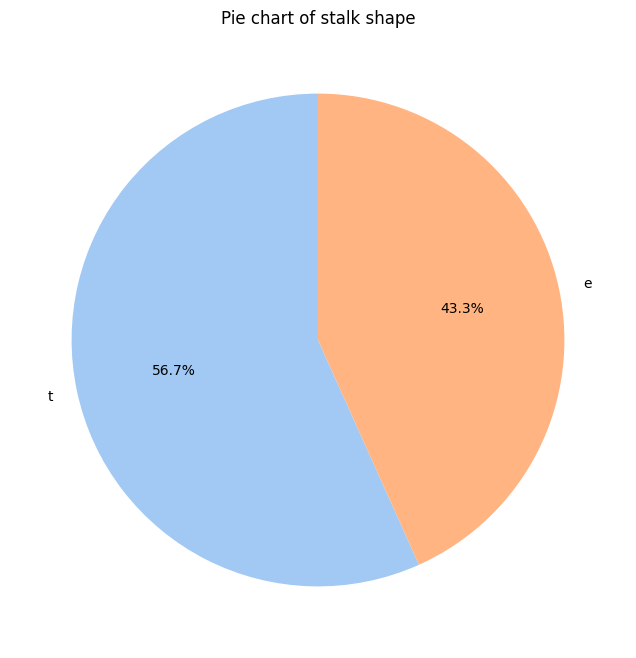

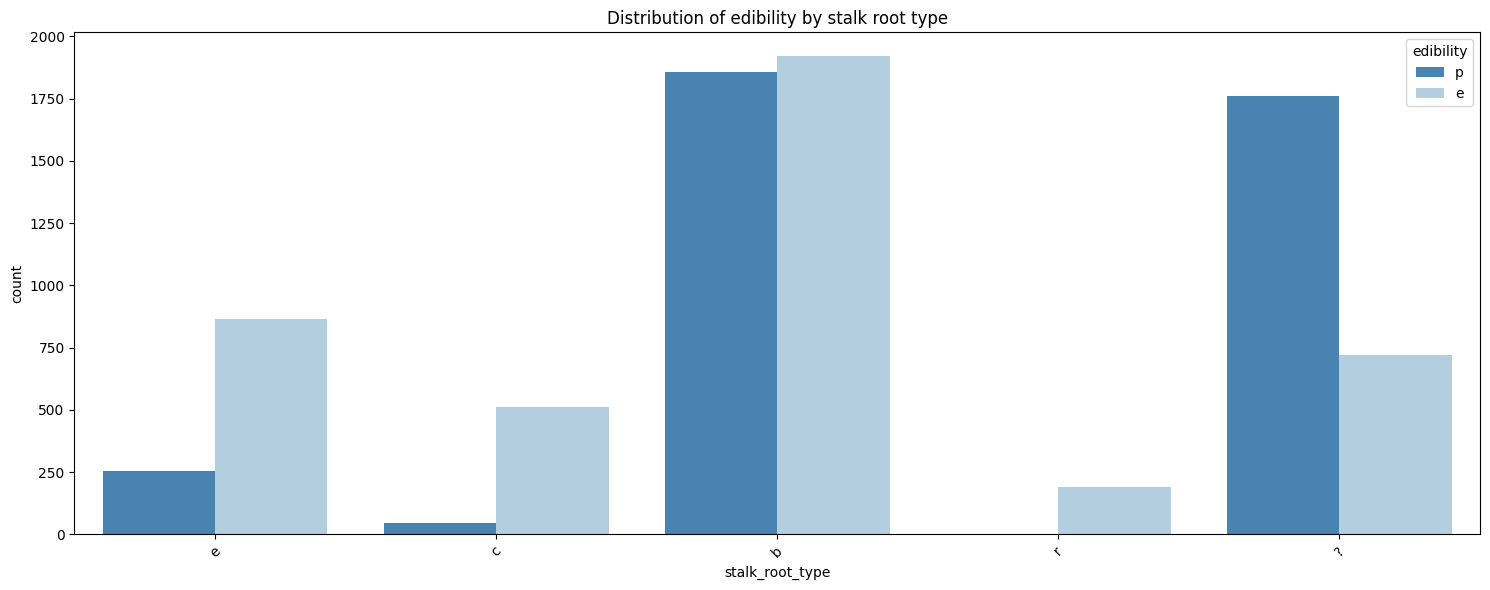

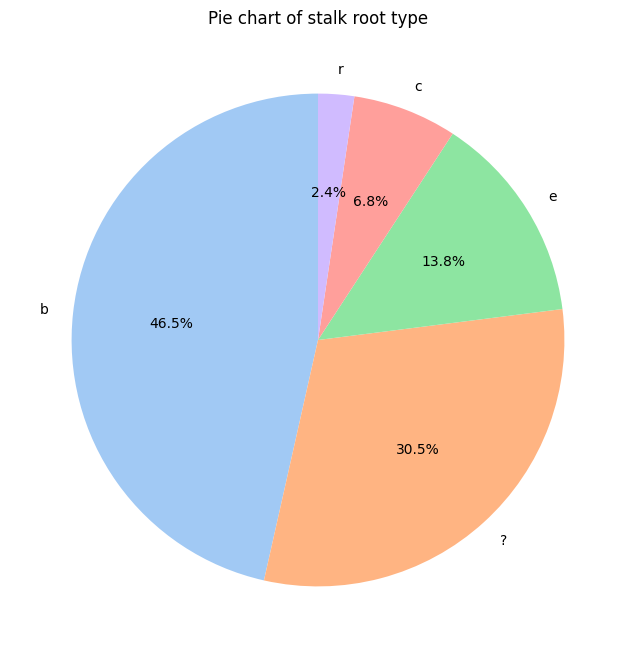

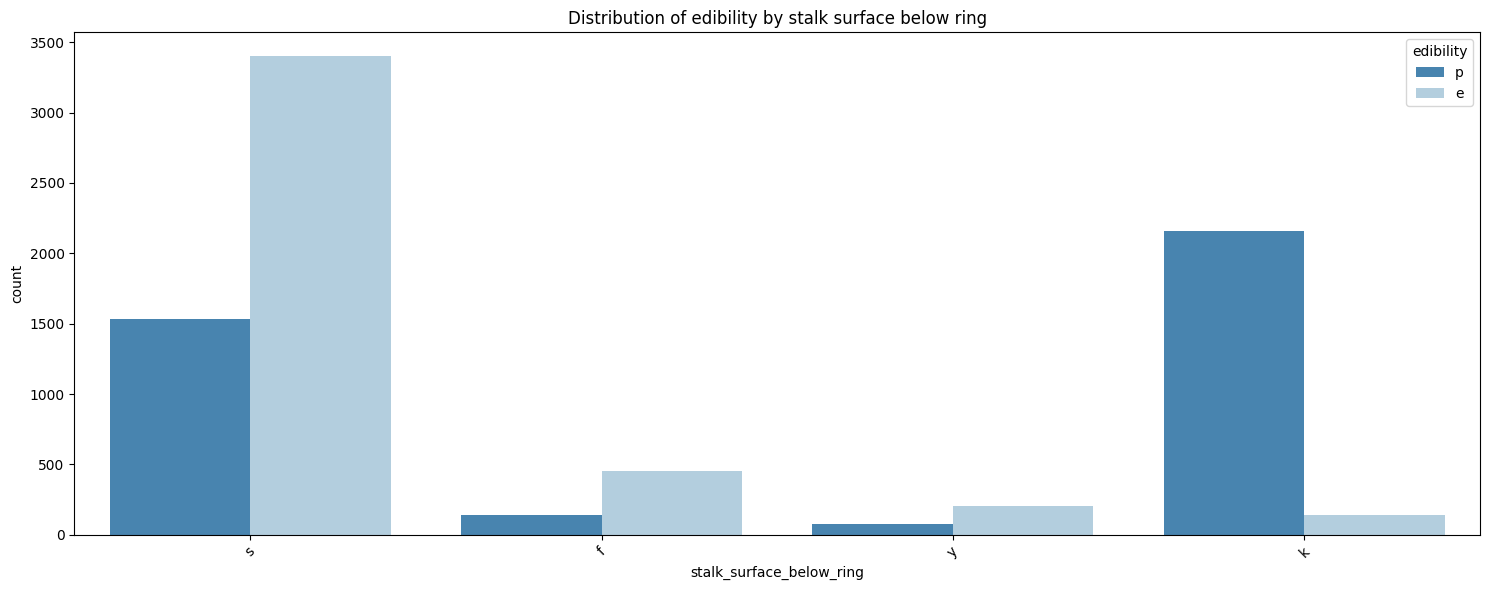

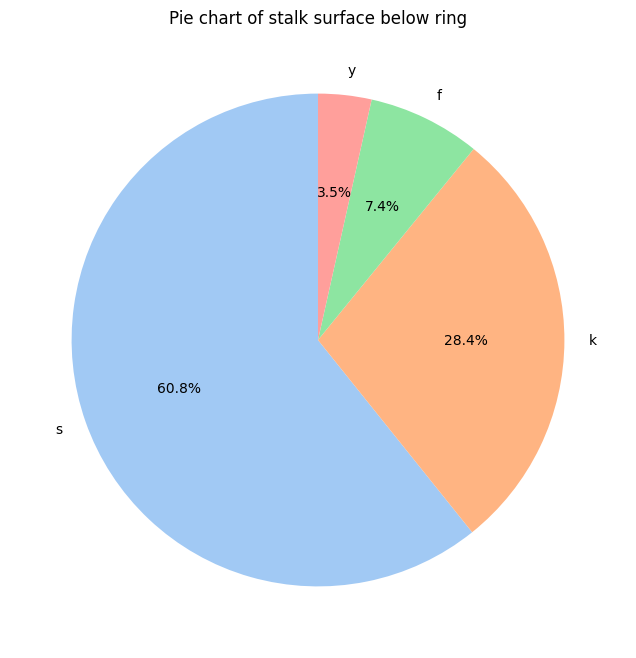

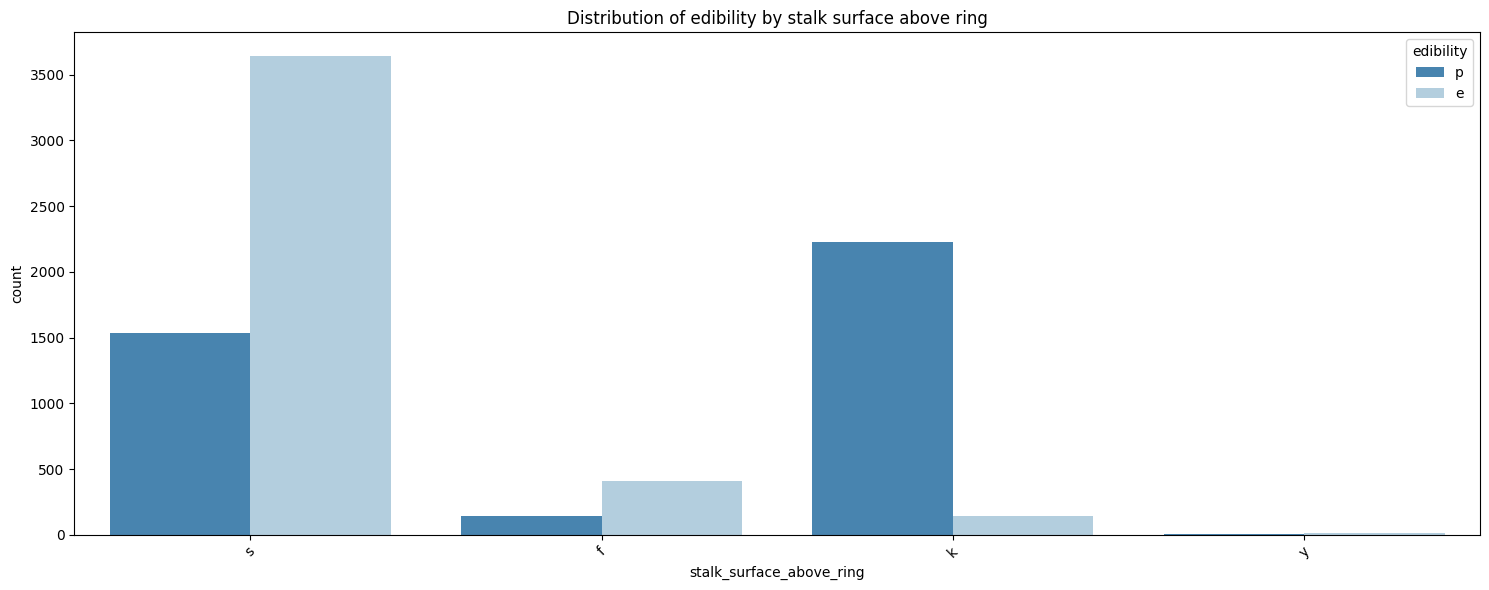

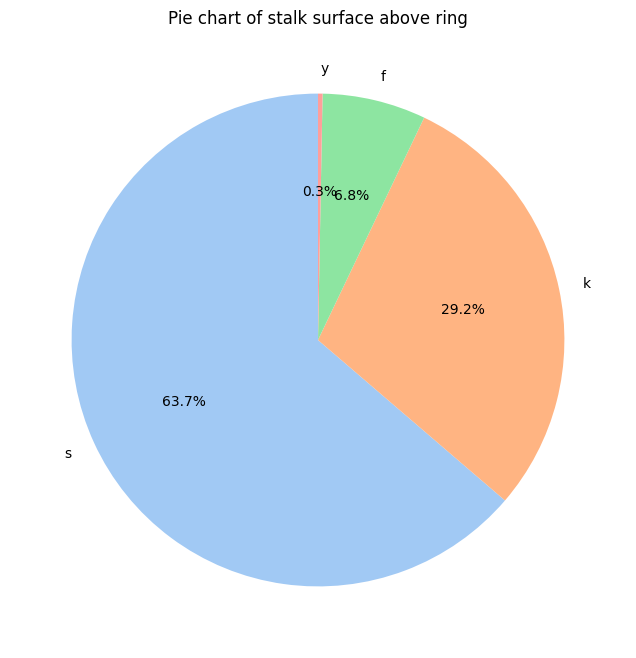

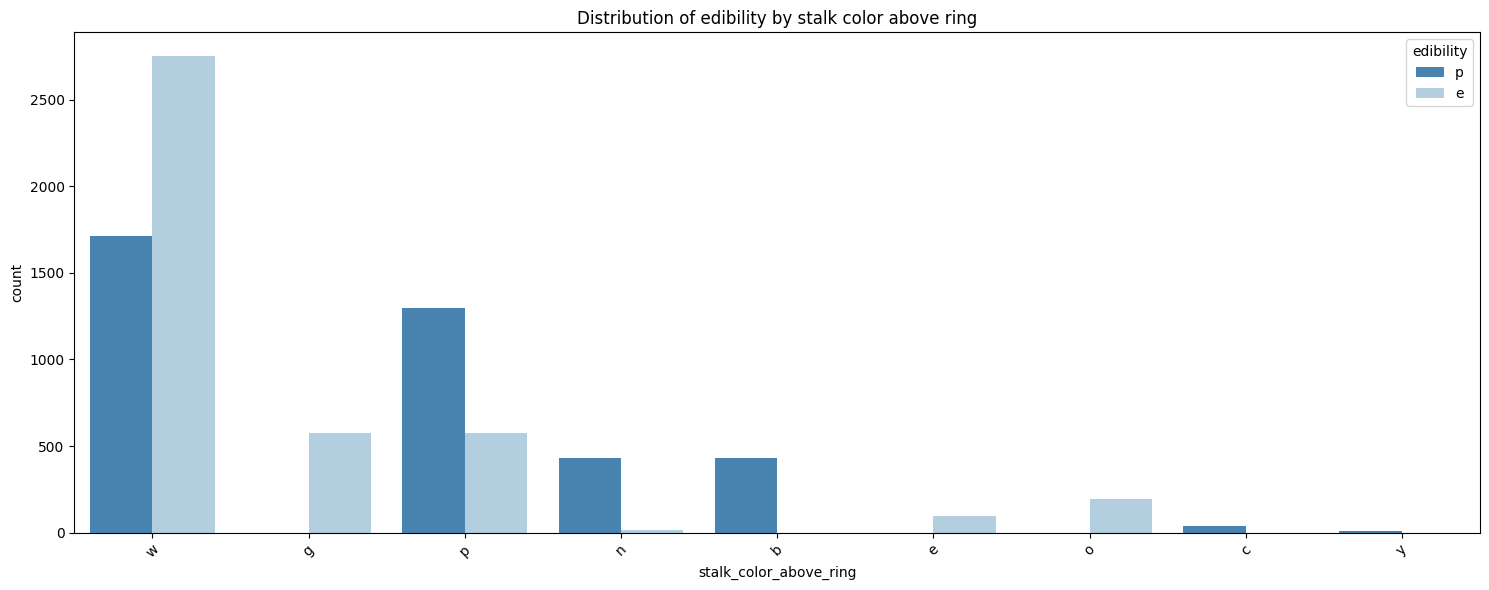

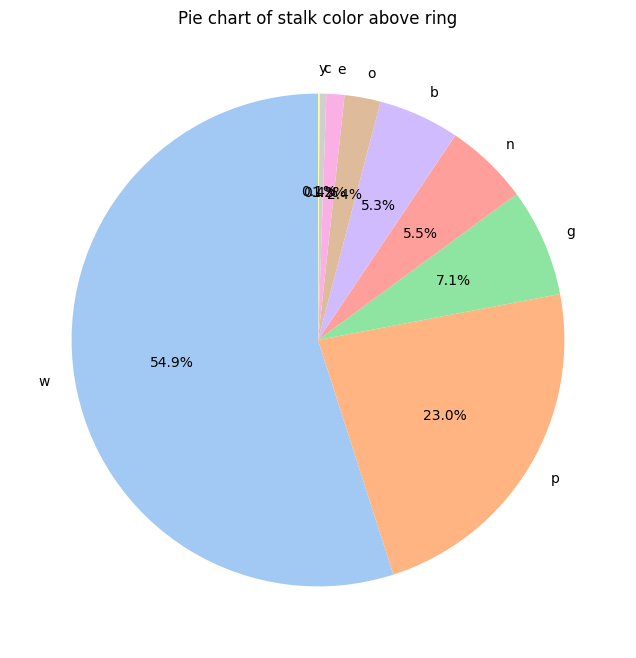

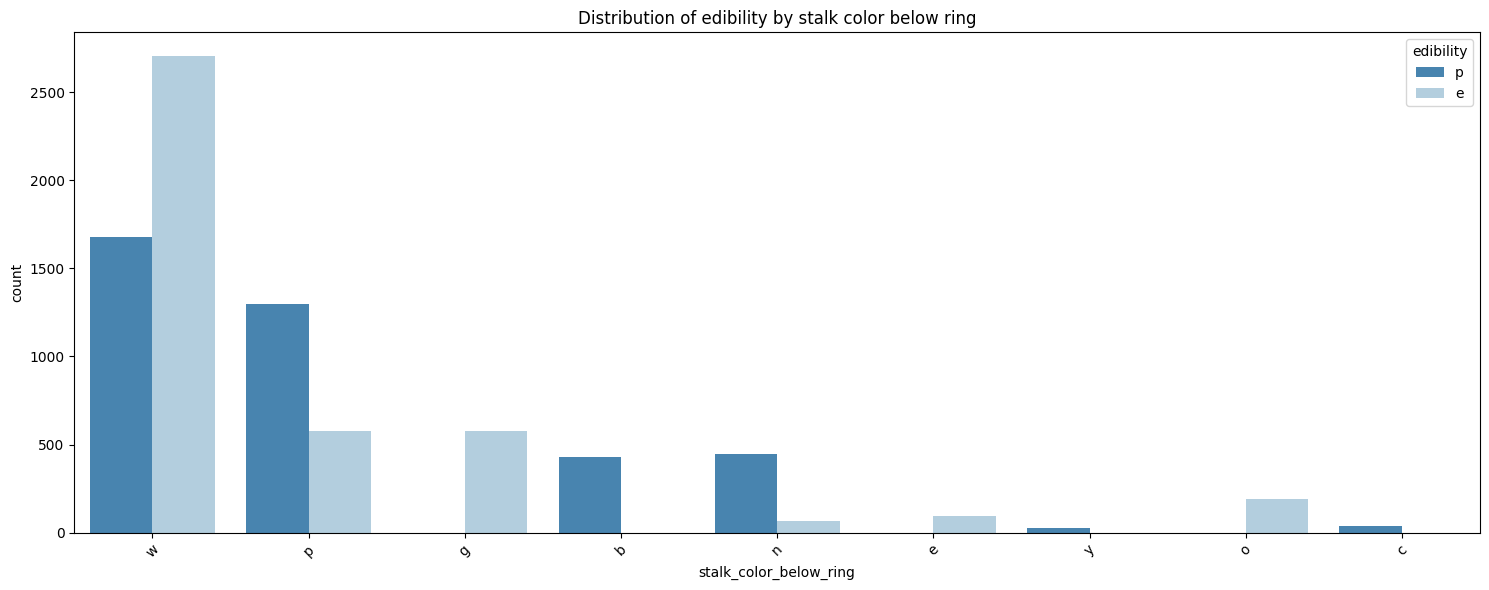

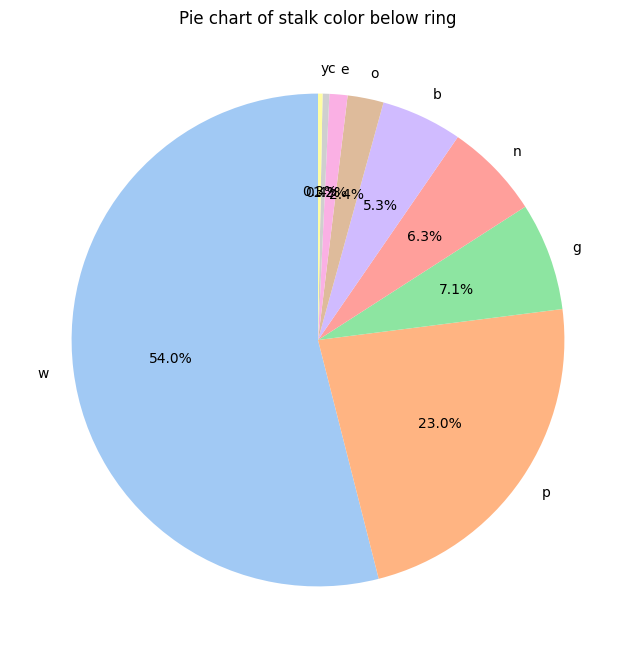

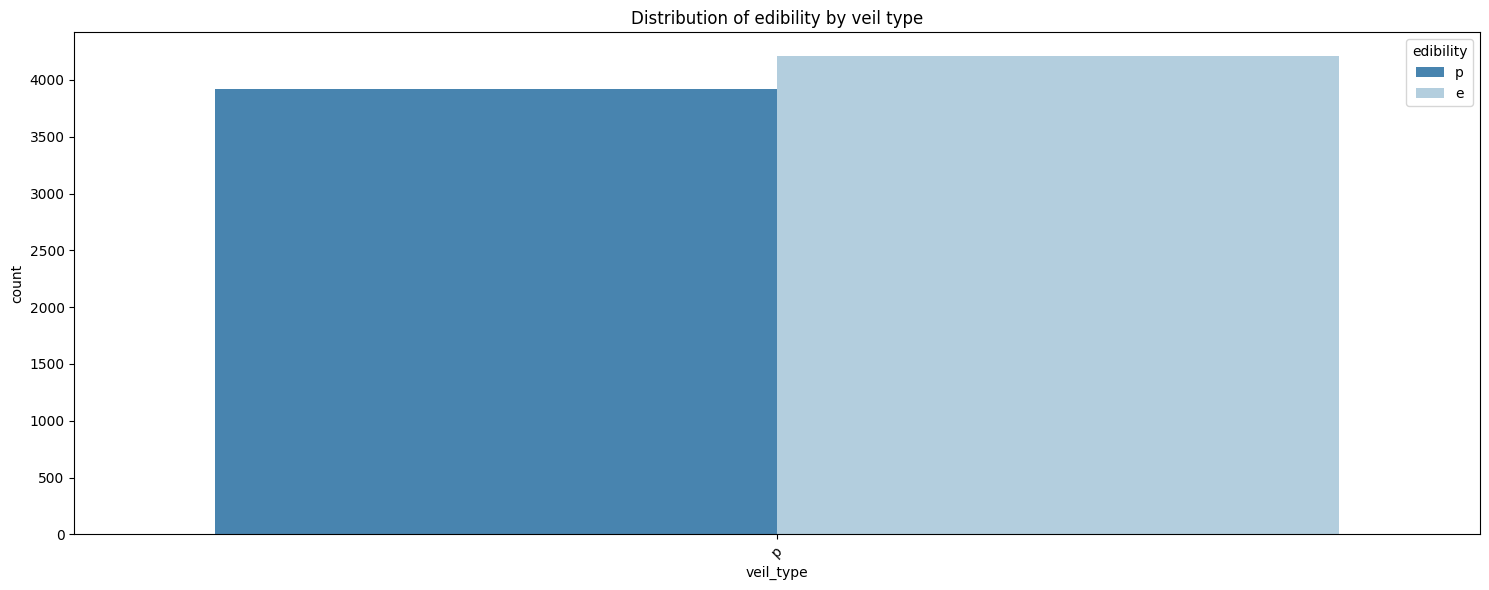

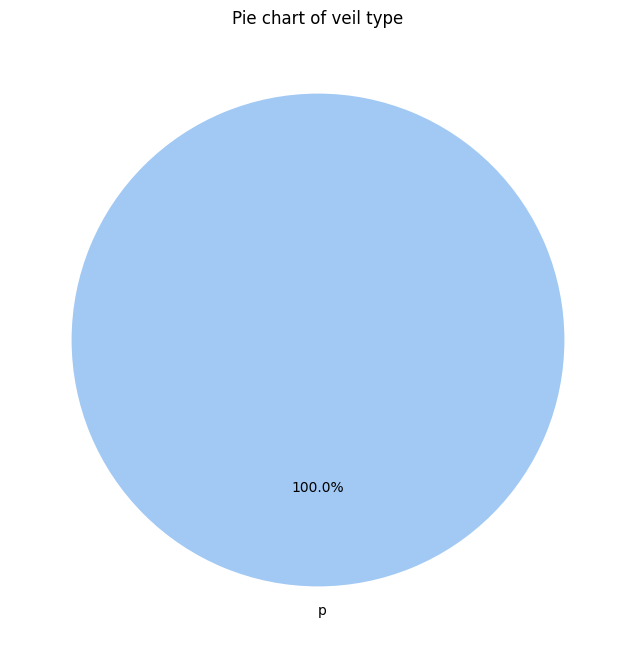

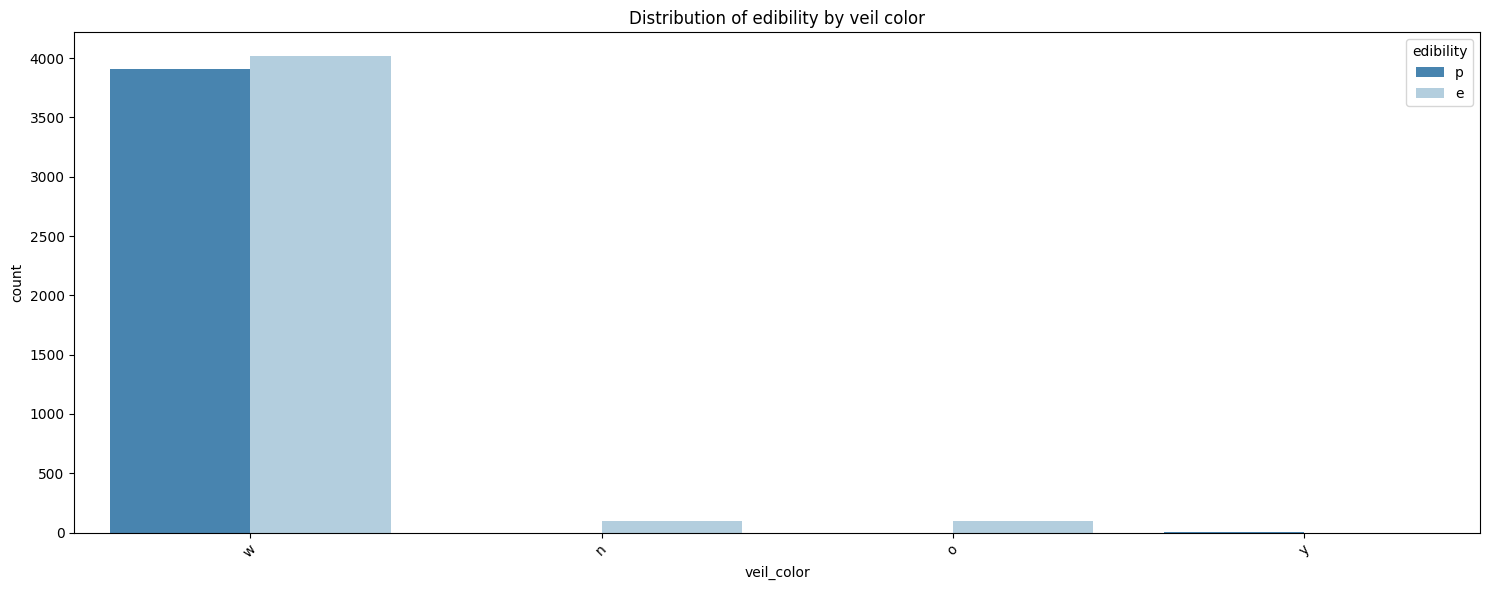

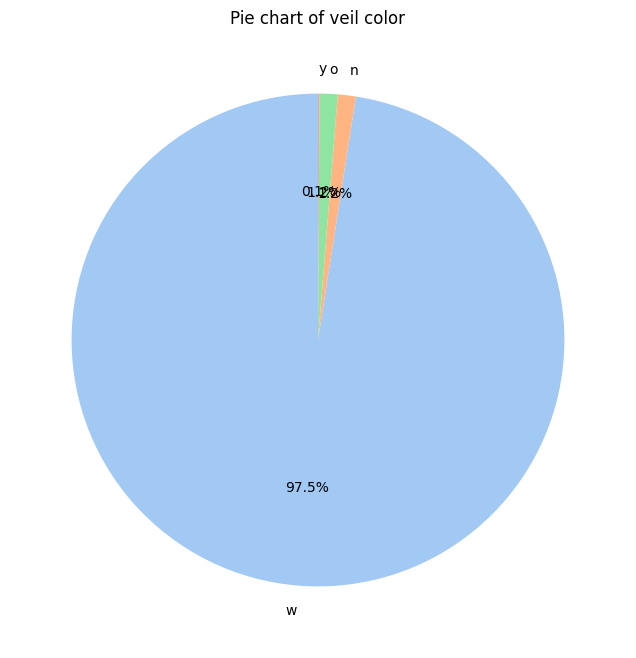

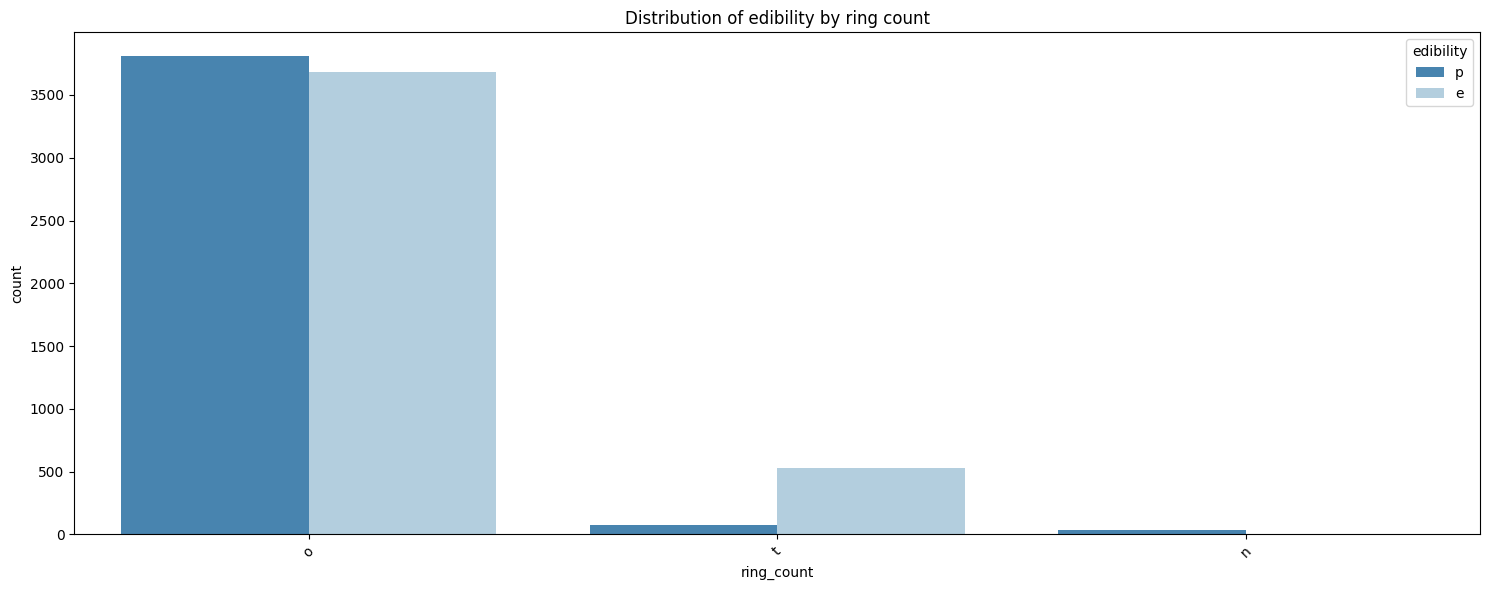

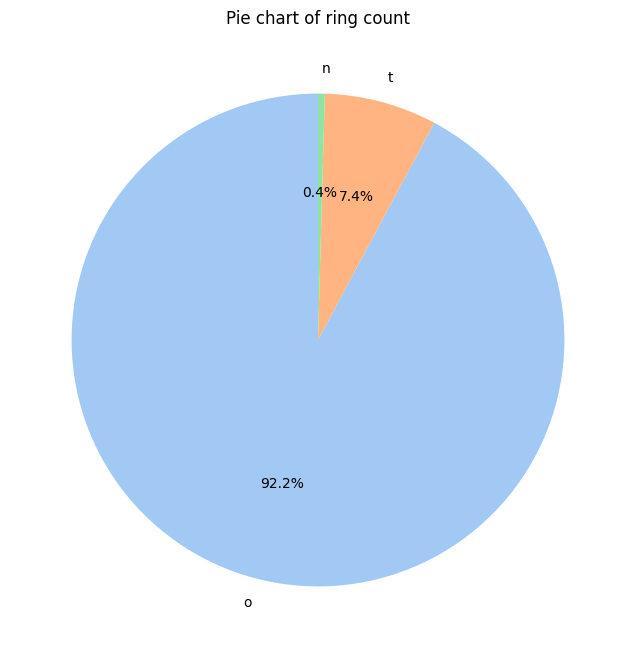

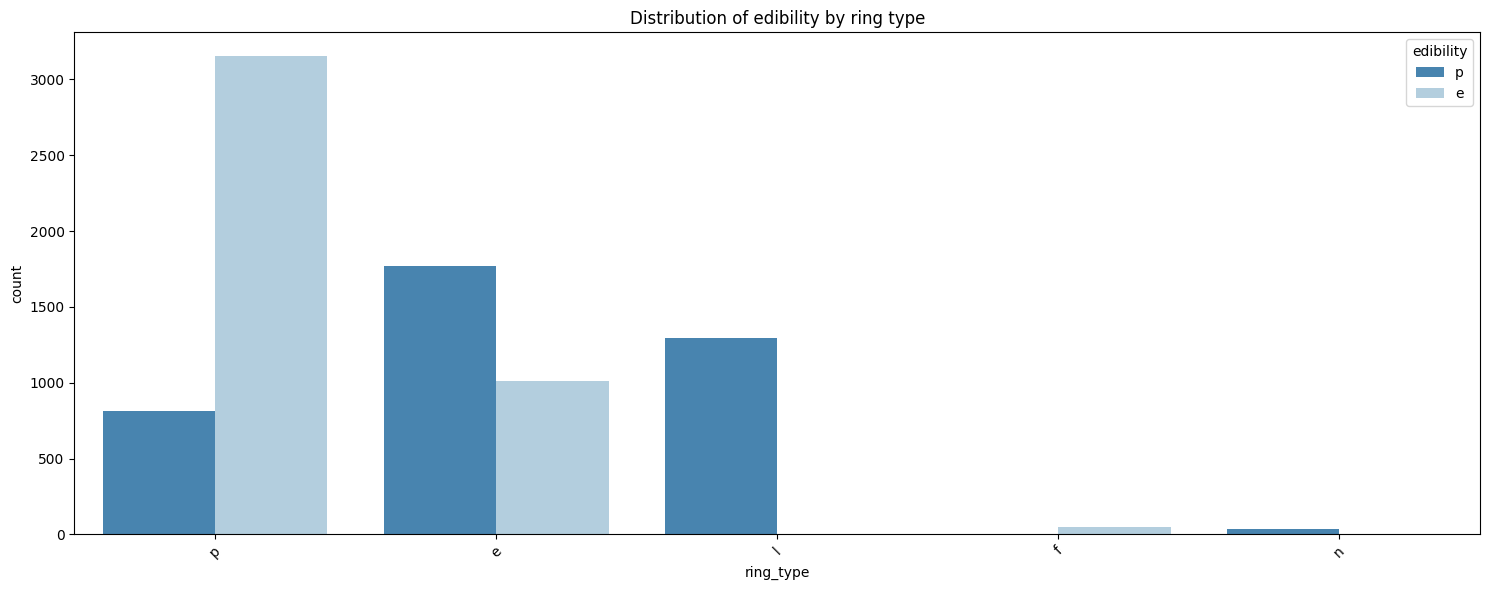

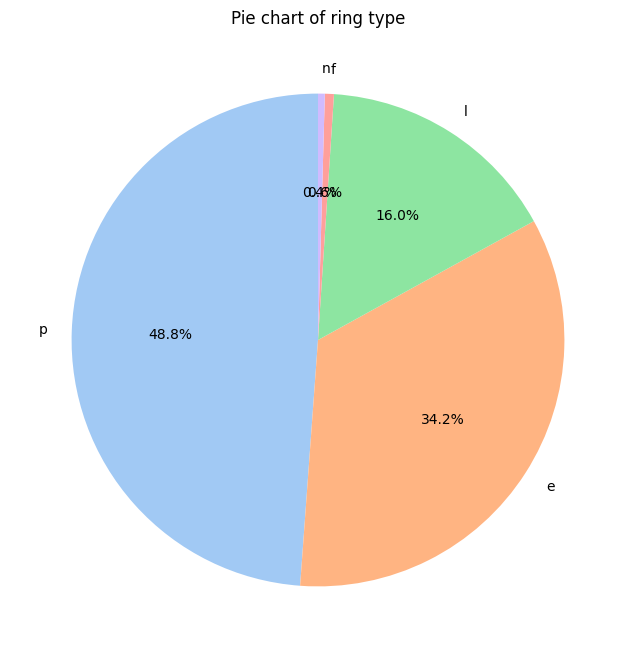

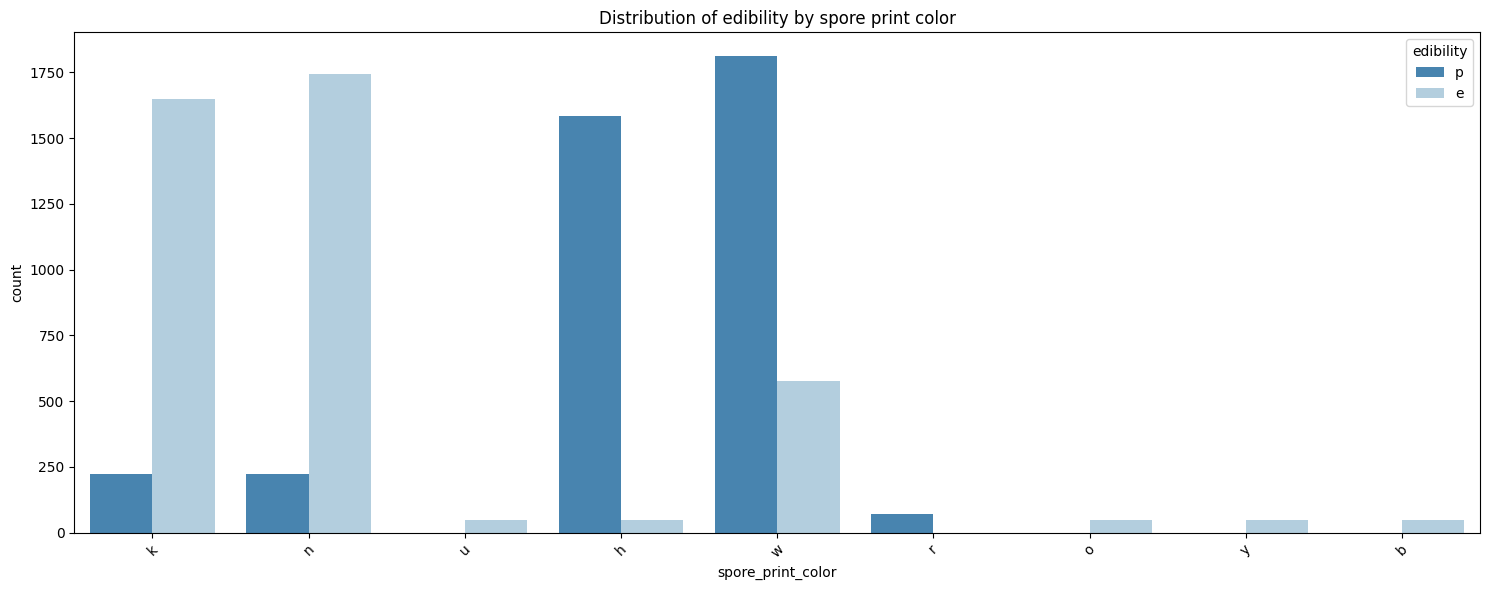

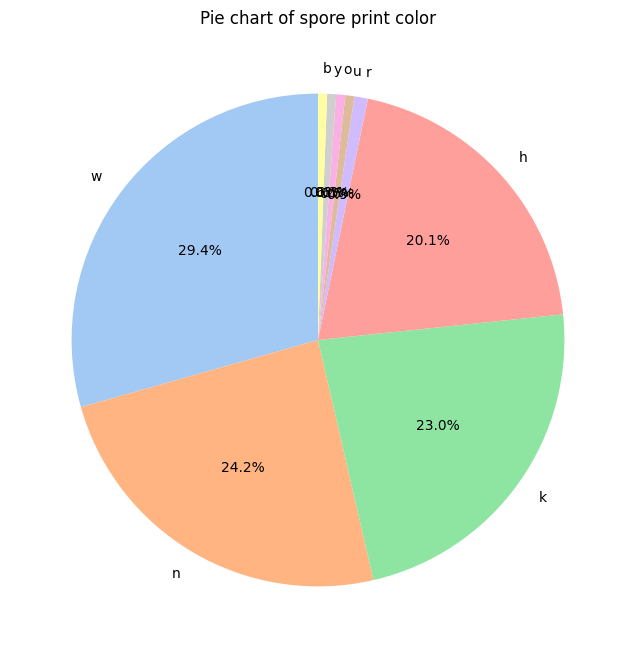

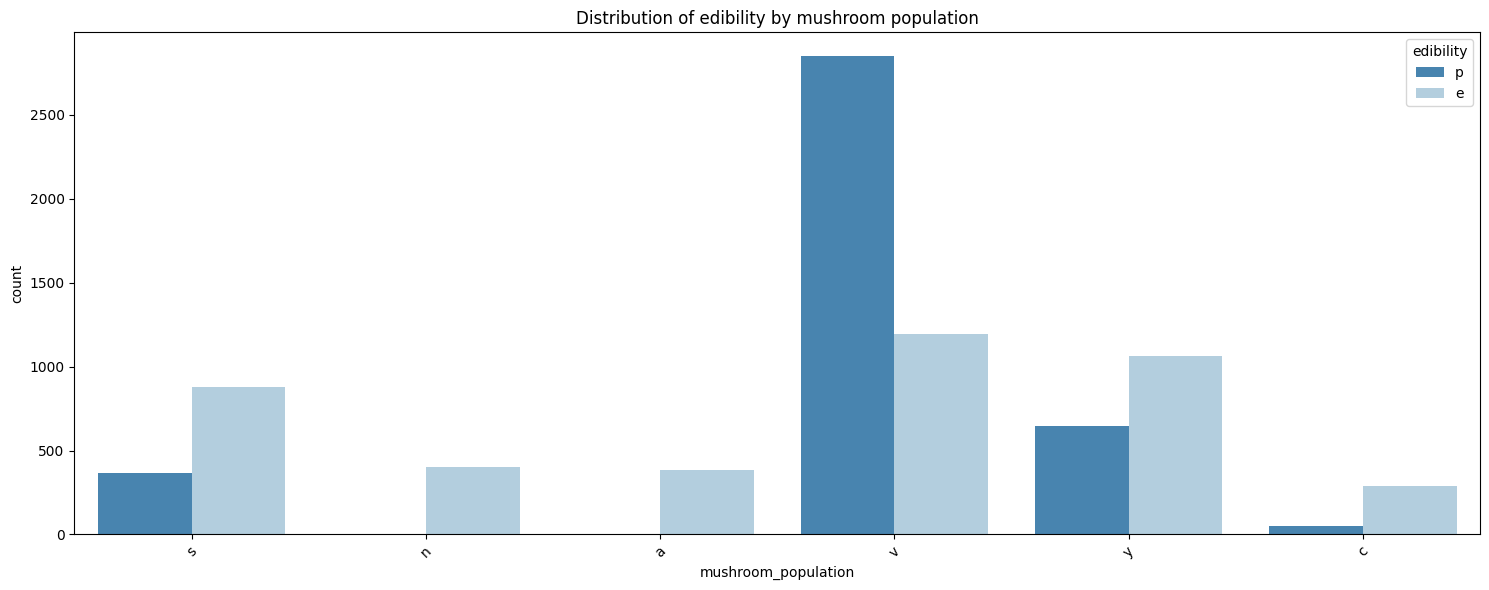

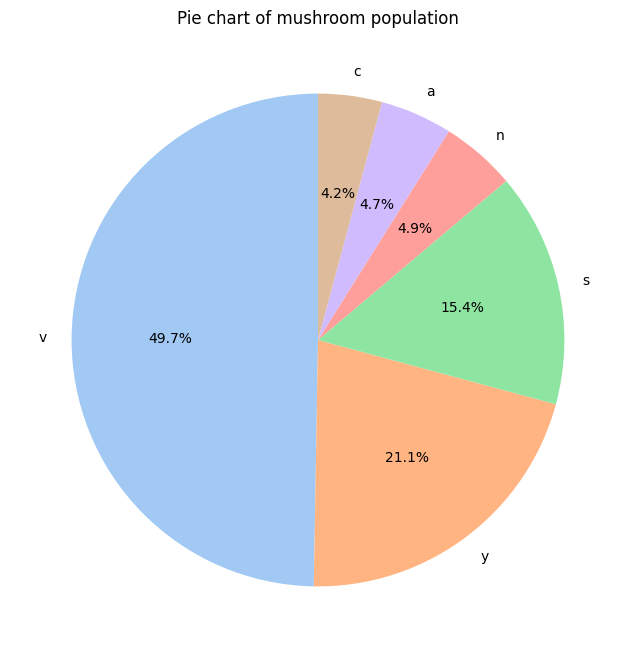

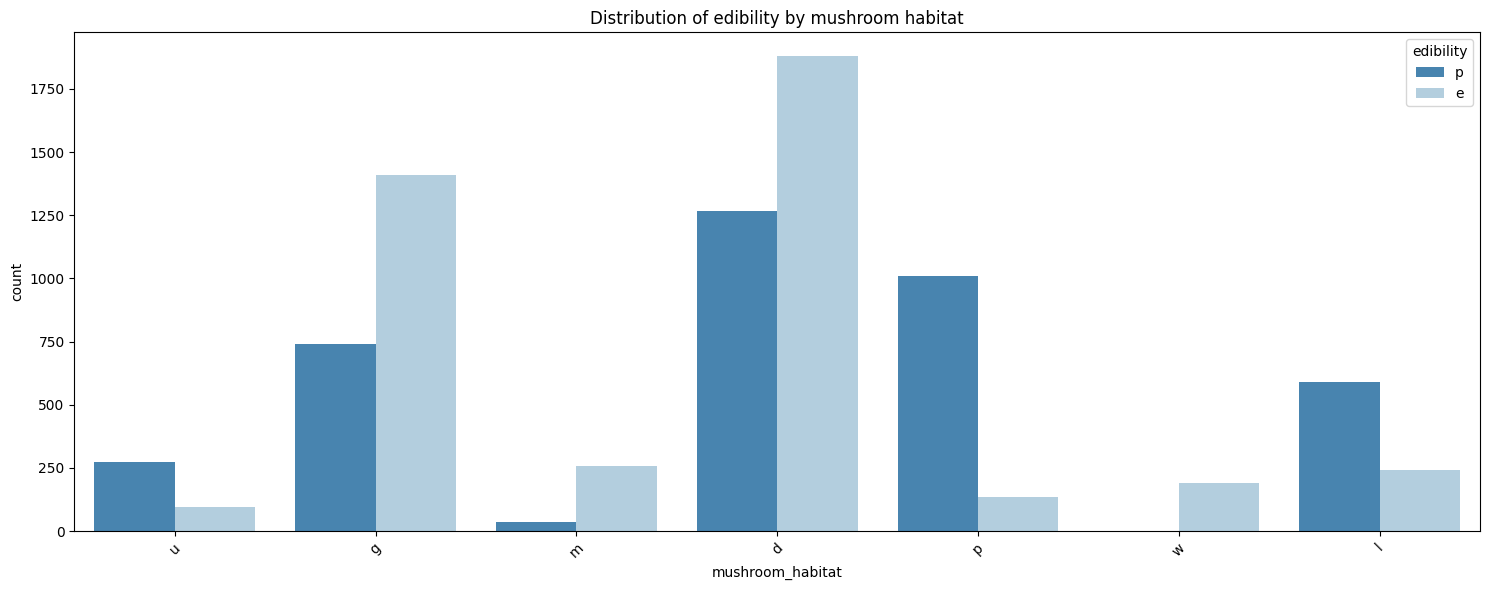

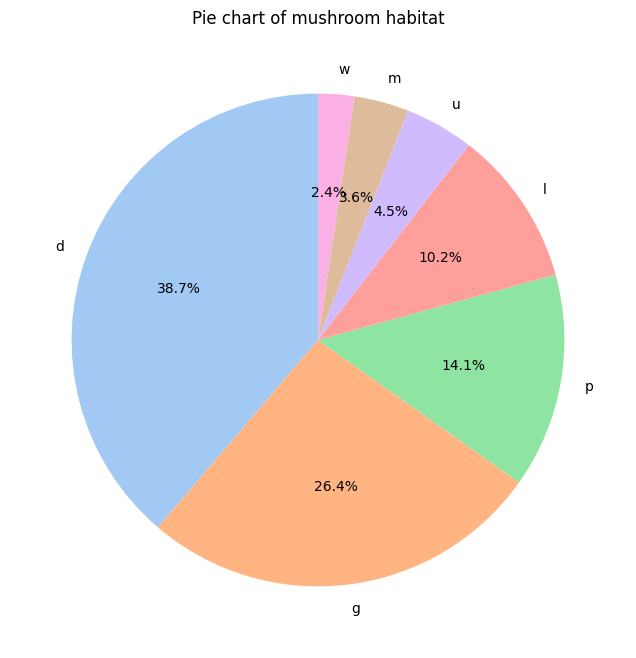

In [3]:
# Features for pie chart analysis
pie_features = [
    'mushroom_cap_surface', 'mushroom_cap_color', 'bruising_present', 
    'mushroom_odor', 'gill_attachment_type', 'gill_spacing', 'gill_size', 
    'gill_color', 'stalk_shape', 'stalk_root_type', 'stalk_surface_below_ring', 
    'stalk_surface_above_ring', 'stalk_color_above_ring', 'stalk_color_below_ring', 
    'veil_type', 'veil_color', 'ring_count', 'ring_type', 'spore_print_color', 
    'mushroom_population', 'mushroom_habitat'
]

# Generate count plots for each feature
for feature in pie_features:
    # Count plot
    plt.figure(figsize=(15, 6))
    sns.countplot(hue=df['edibility'], x=df[feature], palette='Blues_r')
    plt.title(f'Distribution of edibility by {feature.replace("_", " ")}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Pie chart
    edibility_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(
        edibility_counts, 
        labels=edibility_counts.index, 
        autopct='%1.1f%%', 
        colors=sns.color_palette('pastel'),
        startangle=90
    )
    plt.title(f'Pie chart of {feature.replace("_", " ")}')
    plt.show()




In [4]:
#find out relationsheps between some column

interst_columns=['mushroom_odor','gill_color','stalk_color_above_ring','stalk_surface_below_ring','veil_color','ring_count','ring_type','spore_print_color','edibility']
df_select=df[interst_columns]

In [5]:
#transform interst columns to numerical data by encoder
df_select_encode = df_select.copy()
label=LabelEncoder()
for i in df_select :
   df_select_encode[i]=label.fit_transform(df_select_encode[i])

In [6]:
df_select_encode.head()


,mushroom_odor,gill_color,stalk_color_above_ring,stalk_surface_below_ring,veil_color,ring_count,ring_type,spore_print_color,edibility
0,6,4,7,2,2,1,4,2,1
1,0,4,7,2,2,1,4,3,0
2,3,5,7,2,2,1,4,3,0
3,6,5,7,2,2,1,4,2,1
4,5,4,7,2,2,1,0,3,0


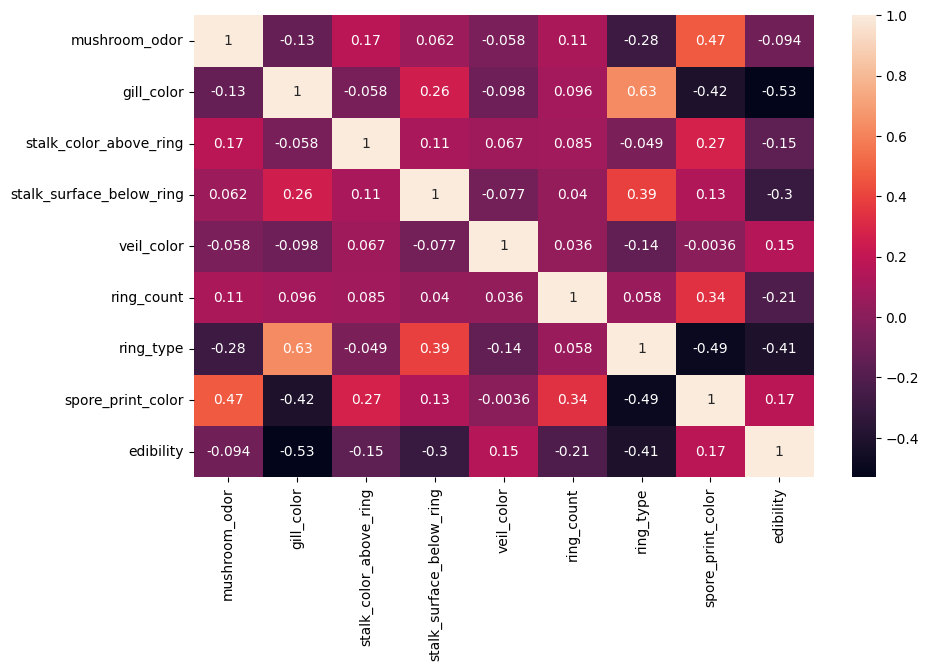

In [6]:
#heatmap by df_select
plt.figure(figsize=(10,6))
corr=df_select_encode.corr()
sns.heatmap(corr,annot=True)
plt.show()

# Create the Models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

In [15]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
X = df.drop('edibility', axis=1)
y = df['edibility']

In [12]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: edibility, Length: 8124, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
dict_models={
    'logistic':LogisticRegression(max_iter=500),
    'SVM':SVC(C=.55),
    'Decision Tree':DecisionTreeClassifier(max_depth=7),
    'Random Forest':RandomForestClassifier(n_estimators=50,max_depth=7,),
    'KNN':KNeighborsClassifier(2),
}


In [19]:
#defination of lists
models_train=[]
accuracy_train=[]
accuracy_test=[]

In [20]:
#train models
models=list(dict_models.values())
for i in range(len(list(dict_models))):
  model = models[i]
  model.fit(X_train,y_train)


  ypred_train=model.predict(X_train)
  acc_train=r2_score(ypred_train,y_train)

    
  ypred_test=model.predict(X_test)
  acc_test=r2_score(ypred_test,y_test)

  accuracy_train.append(acc_train)
  accuracy_test.append(acc_test)

  print('\n',list(dict_models)[i],'\n accuracy train =',acc_train ,'\n accuracy test =',acc_test ,'\n ------------------------------')


 logistic 
 accuracy train = 0.8310649290524804 
 accuracy test = 0.8127528215951337 
 ------------------------------

 SVM 
 accuracy train = 0.9431986979670365 
 accuracy test = 0.9506466053975909 
 ------------------------------

 Decision Tree 
 accuracy train = 1.0 
 accuracy test = 1.0 
 ------------------------------

 Random Forest 
 accuracy train = 0.9833500396244633 
 accuracy test = 0.9876687671498993 
 ------------------------------

 KNN 
 accuracy train = 0.9993837285758204 
 accuracy test = 0.9975352123357693 
 ------------------------------


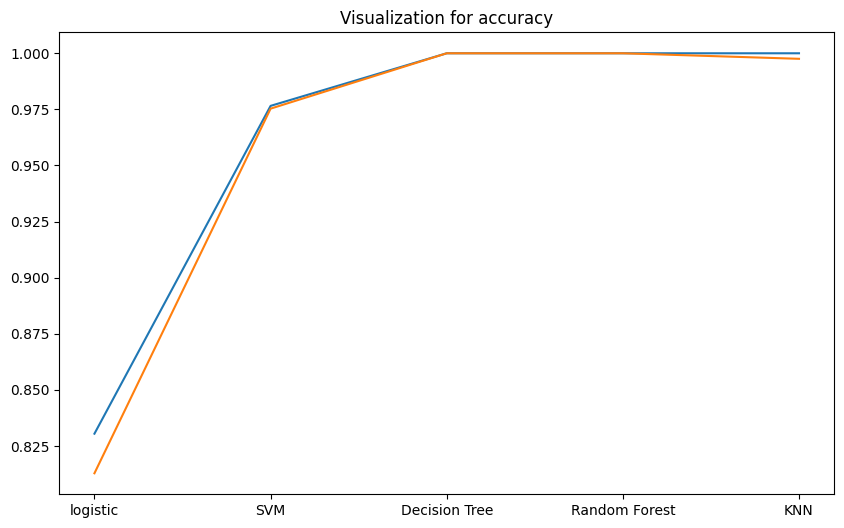

In [20]:
# Visualization for accuracy

plt.figure(figsize=(10,6))
sns.lineplot(x=list(dict_models),y=accuracy_train)
sns.lineplot(x=list(dict_models),y=accuracy_test)

plt.title('Visualization for accuracy')

plt.show()

# featurs seletion using randomforest

In [46]:
clf = dict_models['Decision Tree']

In [47]:
importances = clf.feature_importances_
for i, v in enumerate(importances):
    print(f'Feature: {X.columns[i]}, Importance: {v:.5f}')


Feature: mushroom_cap_shape, Importance: 0.00000
Feature: mushroom_cap_surface, Importance: 0.00000
Feature: mushroom_cap_color, Importance: 0.00000
Feature: bruising_present, Importance: 0.02777
Feature: mushroom_odor, Importance: 0.03746
Feature: gill_attachment_type, Importance: 0.00000
Feature: gill_spacing, Importance: 0.00000
Feature: gill_size, Importance: 0.11672
Feature: gill_color, Importance: 0.33693
Feature: stalk_shape, Importance: 0.02323
Feature: stalk_root_type, Importance: 0.00971
Feature: stalk_surface_above_ring, Importance: 0.00000
Feature: stalk_surface_below_ring, Importance: 0.00190
Feature: stalk_color_above_ring, Importance: 0.00000
Feature: stalk_color_below_ring, Importance: 0.02236
Feature: veil_type, Importance: 0.00000
Feature: veil_color, Importance: 0.00000
Feature: ring_count, Importance: 0.00265
Feature: ring_type, Importance: 0.00000
Feature: spore_print_color, Importance: 0.21303
Feature: mushroom_population, Importance: 0.18064
Feature: mushroom_hab

In [48]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)


Cross-validation scores: [0.92123077 1.         0.99753846 1.         0.92610837]


In [49]:
import numpy as np
import pandas as pd

# Convert feature importances to a pandas Series for easy sorting
importances = clf.feature_importances_
columns = X.columns

# Create a DataFrame to pair columns with their importance values
feature_importances = pd.Series(importances, index=columns)

# Sort the features by importance in descending order
top_features = feature_importances.sort_values(ascending=False)

# Get the top 7 feature names
top_7_features = top_features.head(7).index.tolist()
print(top_7_features)


['gill_color', 'spore_print_color', 'mushroom_population', 'gill_size', 'mushroom_odor', 'bruising_present', 'mushroom_habitat']


In [51]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# selected_features = ['odor', 'spore-print-color', 'gill-size', 'gill-color', 'stalk-surface-below-ring', 'cap-color']

# Filter the dataset to include only the selected features
tree_important_features = X[top_7_features]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tree_important_features, y, test_size=0.3, random_state=42)


# Train and predict with SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, svm_pred))
print("Classification Report:\n", classification_report(y_test, svm_pred))


Accuracy: 0.9885151763740772
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1257
           1       0.99      0.98      0.99      1181

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



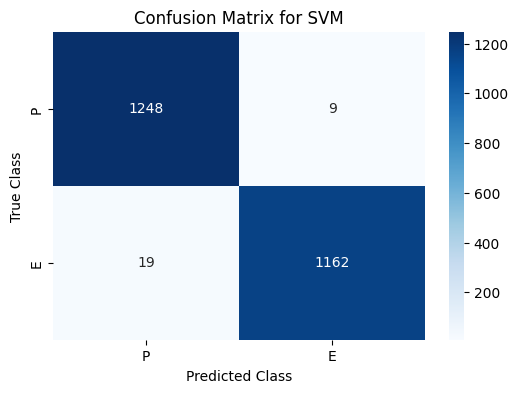

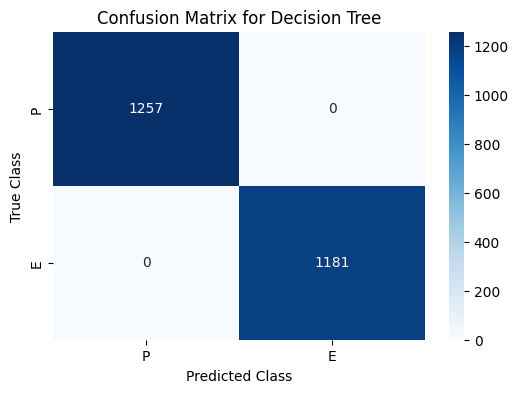

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# Compute confusion matrices
svm_cm = confusion_matrix(y_test, svm_pred)
tree_cm = confusion_matrix(y_test, tree_pred)

# Function to plot confusion matrix
def plot_conf_matrix(cm, title, class_labels):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Predicted Class")
    plt.ylabel("True Class")
    plt.title(title)
    plt.show()

# Visualize confusion matrices
class_labels = ['P', 'E']  # Replace with actual class labels if different
plot_conf_matrix(svm_cm, "Confusion Matrix for SVM", class_labels)
plot_conf_matrix(tree_cm, "Confusion Matrix for Decision Tree", class_labels)


In [54]:
from joblib import dump

dump(svm_model, 'svm_model_98_acc.joblib')


['svm_model_98_acc.joblib']

In [39]:

dump(label_encoders, "label_encoders.joblib")


['label_encoders.joblib']

In [55]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Select top 6 features based on chi-squared test
chi2_selector = SelectKBest(chi2, k=7)
X_new = chi2_selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[chi2_selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['bruising_present', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_root_type', 'ring_type', 'mushroom_habitat'],
      dtype='object')
